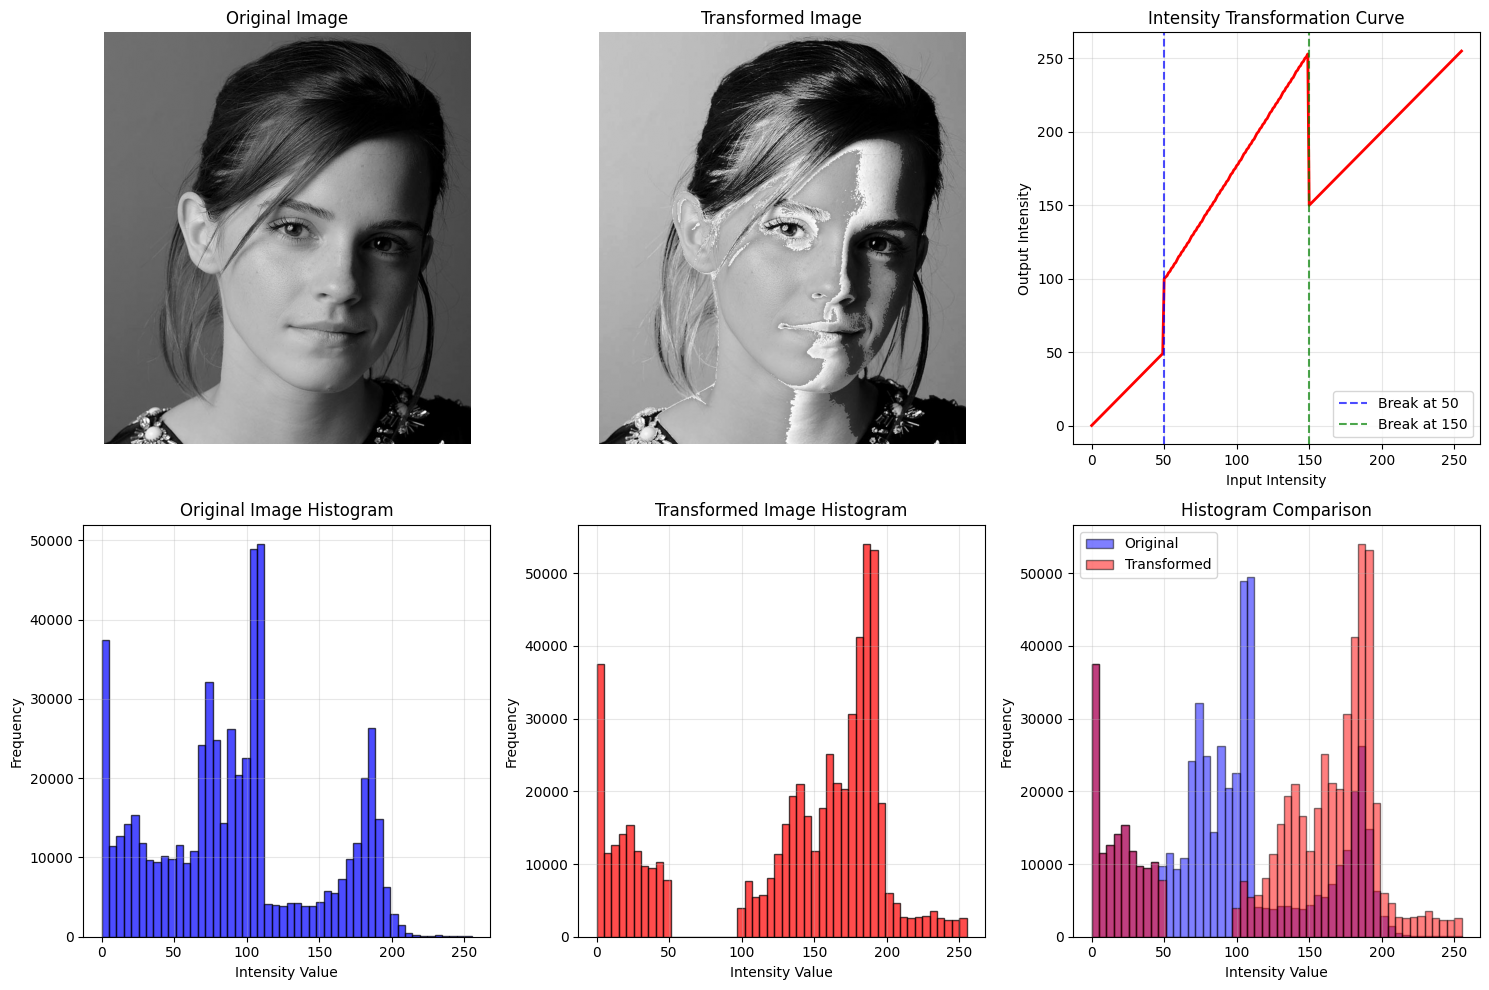

INTENSITY TRANSFORMATION ANALYSIS
Original Image Statistics:
Mean intensity: 92.33
Standard deviation: 56.13
Minimum intensity: 0
Maximum intensity: 255

Transformed Image Statistics:
Mean intensity: 132.93
Standard deviation: 69.12
Minimum intensity: 0
Maximum intensity: 255

Original Intensity Distribution:
Range 0-50: 24.4%
Range 51-100: 32.9%
Range 101-150: 23.0%
Range 151-200: 19.0%
Range 201-255: 0.8%

Transformed Intensity Distribution:
Range 0-50: 24.0%
Range 51-100: 0.3%
Range 101-150: 20.6%
Range 151-200: 49.5%
Range 201-255: 5.5%

TRANSFORMATION EFFECT ANALYSIS
1. DARK TONES (0-50): Mostly preserved, but intensity 50 jumps to 100
2. MID TONES (51-150): Dramatically brightened and expanded
3. BRIGHT TONES (151-255): Slightly modified with a dip at 150
4. OVERALL: Increased contrast and dynamic range
5. The transformation creates a more dramatic intensity distribution


In [14]:
# Question 1
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read image
img = cv2.imread('E:/UoM MSc in AI/Semester 3/IT5437 - Computer Vision/Assignment/a1images/emma.jpg', cv2.IMREAD_GRAYSCALE)

# Create transformation LUT
lut = np.zeros(256, dtype=np.uint8)
lut[0:50] = np.arange(0, 50)           # 0-49: same as input
lut[50] = 100                          # At 50: jump to 100
lut[51:151] = np.linspace(101, 255, 100, dtype=np.uint8)  # 51-150: increase to 255
lut[150] = 150                         # At 150: drop to 150
lut[151:256] = np.linspace(151, 255, 105, dtype=np.uint8) # 151-255: increase to 255

# Apply transformation
transformed = cv2.LUT(img, lut)

# Show comprehensive results
plt.figure(figsize=(15, 10))

# Original and transformed images
plt.subplot(2, 3, 1); plt.imshow(img, cmap='gray'); plt.title('Original Image'); plt.axis('off')
plt.subplot(2, 3, 2); plt.imshow(transformed, cmap='gray'); plt.title('Transformed Image'); plt.axis('off')

# Transformation curve
plt.subplot(2, 3, 3)
plt.plot(lut, 'r-', linewidth=2)
plt.title('Intensity Transformation Curve')
plt.xlabel('Input Intensity')
plt.ylabel('Output Intensity')
plt.grid(True, alpha=0.3)
plt.axvline(50, color='blue', linestyle='--', alpha=0.7, label='Break at 50')
plt.axvline(150, color='green', linestyle='--', alpha=0.7, label='Break at 150')
plt.legend()

# Original histogram
plt.subplot(2, 3, 4); plt.hist(img.ravel(), bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Original Image Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Transformed histogram
plt.subplot(2, 3, 5); plt.hist(transformed.ravel(), bins=50, color='red', alpha=0.7, edgecolor='black')
plt.title('Transformed Image Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Comparison histogram
plt.subplot(2, 3, 6)
plt.hist(img.ravel(), bins=50, color='blue', alpha=0.5, label='Original', edgecolor='black')
plt.hist(transformed.ravel(), bins=50, color='red', alpha=0.5, label='Transformed', edgecolor='black')
plt.title('Histogram Comparison')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical analysis
print("INTENSITY TRANSFORMATION ANALYSIS")
print("Original Image Statistics:")
print(f"Mean intensity: {np.mean(img):.2f}")
print(f"Standard deviation: {np.std(img):.2f}")
print(f"Minimum intensity: {np.min(img)}")
print(f"Maximum intensity: {np.max(img)}")

print(f"\nTransformed Image Statistics:")
print(f"Mean intensity: {np.mean(transformed):.2f}")
print(f"Standard deviation: {np.std(transformed):.2f}")
print(f"Minimum intensity: {np.min(transformed)}")
print(f"Maximum intensity: {np.max(transformed)}")

# Analyze specific ranges
def analyze_range(data, name, ranges):
    print(f"\n{name} Intensity Distribution:")
    for low, high in ranges:
        count = np.sum((data >= low) & (data <= high))
        percentage = (count / data.size) * 100
        print(f"Range {low}-{high}: {percentage:.1f}%")

ranges = [(0, 50), (51, 100), (101, 150), (151, 200), (201, 255)]
analyze_range(img, "Original", ranges)
analyze_range(transformed, "Transformed", ranges)

print(f"\nTRANSFORMATION EFFECT ANALYSIS")
print("1. DARK TONES (0-50): Mostly preserved, but intensity 50 jumps to 100")
print("2. MID TONES (51-150): Dramatically brightened and expanded")
print("3. BRIGHT TONES (151-255): Slightly modified with a dip at 150")
print("4. OVERALL: Increased contrast and dynamic range")
print("5. The transformation creates a more dramatic intensity distribution")

In [ ]:
# Question 2
